In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import os
import seaborn as sns
import sklearn
assert sklearn.__version__ >= "0.20"
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

# 1. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require? [2 points]

In [ ]:
csv_file_path = '/content/aggregateRockData.xlsx'

rock_category = pd.read_excel(csv_file_path, header=None)
rock_category = rock_category.iloc[:, 1]

rock_category = rock_category.to_frame(name='rock_category')
rock_category.head()

,rock_category
0,1
1,1
2,1
3,1
4,1


In [ ]:
csv_file_path = '/content/feature_presence540.txt'

feature_data = pd.read_csv(csv_file_path, delim_whitespace=True, header=None)

rock_features = feature_data.iloc[:, 3:14]

rock_features.columns = [
    'Angular fragments',
    'Rounded fragments',
    'Straight stripes',
    'Curved stripes',
    'Physical layers',
    'Veins',
    'Oily/shimmery texture',
    'Splotchy texture',
    'Single translucent crystal',
    'Multiple cubic crystals',
    'Sandy texture'
]

rock_features.head()

,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
0,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05


In [ ]:
# Merge the DataFrames on the common column 'id'
rock_data = pd.merge(rock_category, rock_features, left_index=True, right_index=True)

# Display the data
rock_data.head()

,rock_category,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
0,1,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,1,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,1,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,1,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,1,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05


In [ ]:
rock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 0 to 539
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rock_category               540 non-null    int64  
 1   Angular fragments           540 non-null    object 
 2   Rounded fragments           540 non-null    object 
 3   Straight stripes            540 non-null    object 
 4   Curved stripes              540 non-null    float64
 5   Physical layers             540 non-null    float64
 6   Veins                       540 non-null    float64
 7   Oily/shimmery texture       540 non-null    float64
 8   Splotchy texture            540 non-null    float64
 9   Single translucent crystal  540 non-null    float64
 10  Multiple cubic crystals     540 non-null    float64
 11  Sandy texture               540 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 54.8+ KB


As advised, we will limit our assessment to only first 480 rows

In [ ]:
rock_data = rock_data[:480]
rock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rock_category               480 non-null    int64  
 1   Angular fragments           480 non-null    object 
 2   Rounded fragments           480 non-null    object 
 3   Straight stripes            480 non-null    object 
 4   Curved stripes              480 non-null    float64
 5   Physical layers             480 non-null    float64
 6   Veins                       480 non-null    float64
 7   Oily/shimmery texture       480 non-null    float64
 8   Splotchy texture            480 non-null    float64
 9   Single translucent crystal  480 non-null    float64
 10  Multiple cubic crystals     480 non-null    float64
 11  Sandy texture               480 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 48.8+ KB


In [ ]:
unique_counts = rock_data.nunique()
print(unique_counts)

rock_category                  3
Angular fragments             21
Rounded fragments             20
Straight stripes              21
Curved stripes                18
Physical layers               21
Veins                         13
Oily/shimmery texture         21
Splotchy texture              17
Single translucent crystal    16
Multiple cubic crystals       16
Sandy texture                 20
dtype: int64


In [ ]:
missing_values = rock_data.isnull().sum()
missing_values

,0
rock_category,0
Angular fragments,0
Rounded fragments,0
Straight stripes,0
Curved stripes,0
Physical layers,0
Veins,0
Oily/shimmery texture,0
Splotchy texture,0
Single translucent crystal,0


The new limited Rock Dataset has a total of 480 rows and 12 columns for details about rock_category  (1 = Igneous, 2 = Metamorphic, 3 = Sedimentary) and features of rocks which include Angular fragments, Rounded fragments, Straight stripes, Curved stripes, Physical layers, Veins, Oily/shimmery texture, Splotchy texture, Single translucent crystal, Multiple cubic crystals, Sandy texture.

Categorical Variables:
rock_category


Continious Variables:
Angular fragments, Rounded fragments, Straight stripes, Curved stripes, Physical layers, Veins, Oily/shimmery texture, Splotchy texture, Single translucent crystal, Multiple cubic crystals & Sandy texture.

Furthermore, there are no null values in any feature so no special treatment is required.

In [ ]:
rock_data.describe()

,rock_category,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,2.000000,0.042292,0.165146,0.052396,0.144479,0.141458,0.031667,0.025104,0.119854
std,0.817348,0.160970,0.216635,0.102676,0.265689,0.168222,0.135647,0.112153,0.173149
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.050000
75%,3.000000,0.000000,0.212500,0.050000,0.100000,0.200000,0.000000,0.000000,0.150000
max,3.000000,1.000000,0.950000,0.900000,1.000000,0.950000,1.000000,1.000000,1.000000


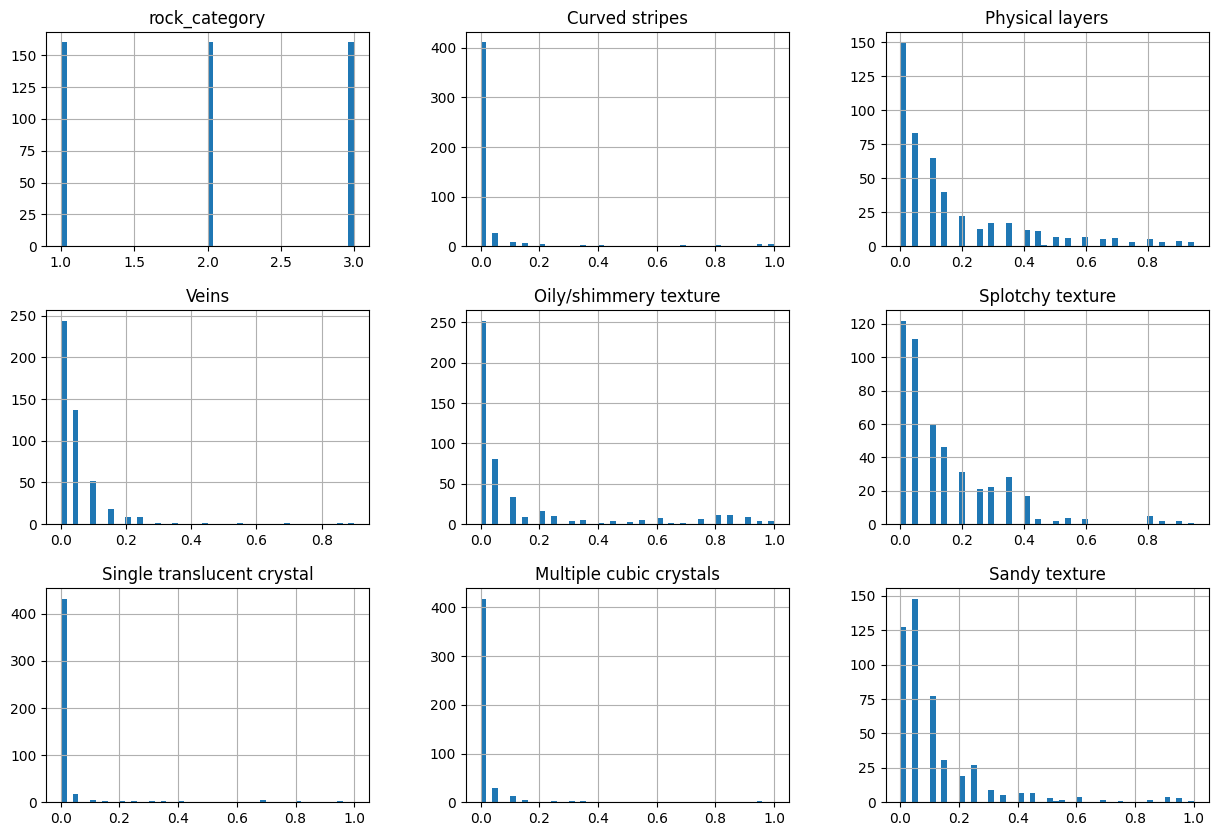

In [ ]:
rock_data.hist(bins=50, figsize=(15,10))
plt.show()

The histograms depict the distributions of different features for a rock classification dataset:

rock_category: Distinct peaks at values 1, 2, and 3 indicate three primary rock categories.

Angular and Rounded Fragments: Both features show a high frequency near zero, with a few instances spread across the range, suggesting these characteristics are rare.

Straight and Curved Stripes: Almost all values are near zero, indicating that stripes are uncommon among the rocks.

Physical Layers: Mostly concentrated near zero, implying that rocks with physical layers are infrequent.

Veins and Oily/Shimmery Texture: High concentrations near zero, with some variation, suggesting these features are generally uncommon.

Splotchy and Sandy Texture: Show a skewed distribution with a gradual decrease, indicating moderate presence in some rocks.

Single Translucent Crystal and Multiple Cubic Crystals: Almost all values are near zero, indicating these crystal types are rare.

Sandy Texture: Shows a slightly higher prevalence compared to other texture types, with more instances spread across low values.

Overall, most features have values concentrated near zero, indicating that the presence of these features is generally rare among the rocks in the dataset.

# 2. Analyze and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson Correlation Coeﬃcient (PCC) and generating scatter plots. [3 points]

In [ ]:
corr_matrix = rock_data.corr(numeric_only=True)
corr_matrix["rock_category"].sort_values(ascending=False)

,rock_category
rock_category,1.000000
Physical layers,0.266699
Single translucent crystal,0.258910
Veins,0.140553
Sandy texture,0.139845
Multiple cubic crystals,0.113872
Oily/shimmery texture,0.008172
Curved stripes,-0.017454
Splotchy texture,-0.229273


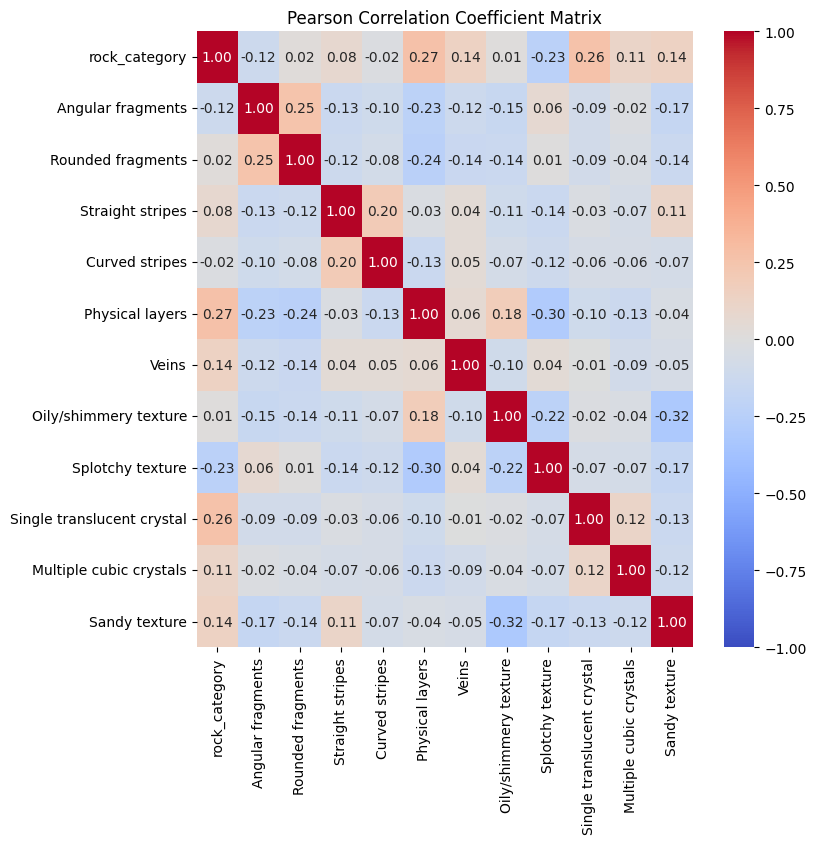

In [ ]:
# Compute the Pearson Correlation Coefficient matrix
corr_matrix = rock_data.corr()

# Display the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True,  cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Pearson Correlation Coefficient Matrix')
plt.show()


Weak Positive Correlation: Rock Category has a weak positive correlation with Physical layers, Single translucent crystal, Veins, Sandy texture, Multiple cubic crystals & Oily/shimmery texture

Weak Negative Correcation: Rock Cateogry has a weak negative correlation with Splotchy texture and Curved stripes.

Oily/Shimmery Texture & Sandy Texture (-0.32) have negative correlation, indicating that rocks with oily or shimmery textures are unlikely to have sandy textures.

Physical Layers & Splotchy Texture (0.30) have weak positive correlation, suggesting that rocks with physical layers often exhibit splotchy textures.

Angular Fragments & Rounded Fragments (0.25) has A weak positive correlation, showing that rocks can have a combination of angular and rounded fragments.





Scatter plots

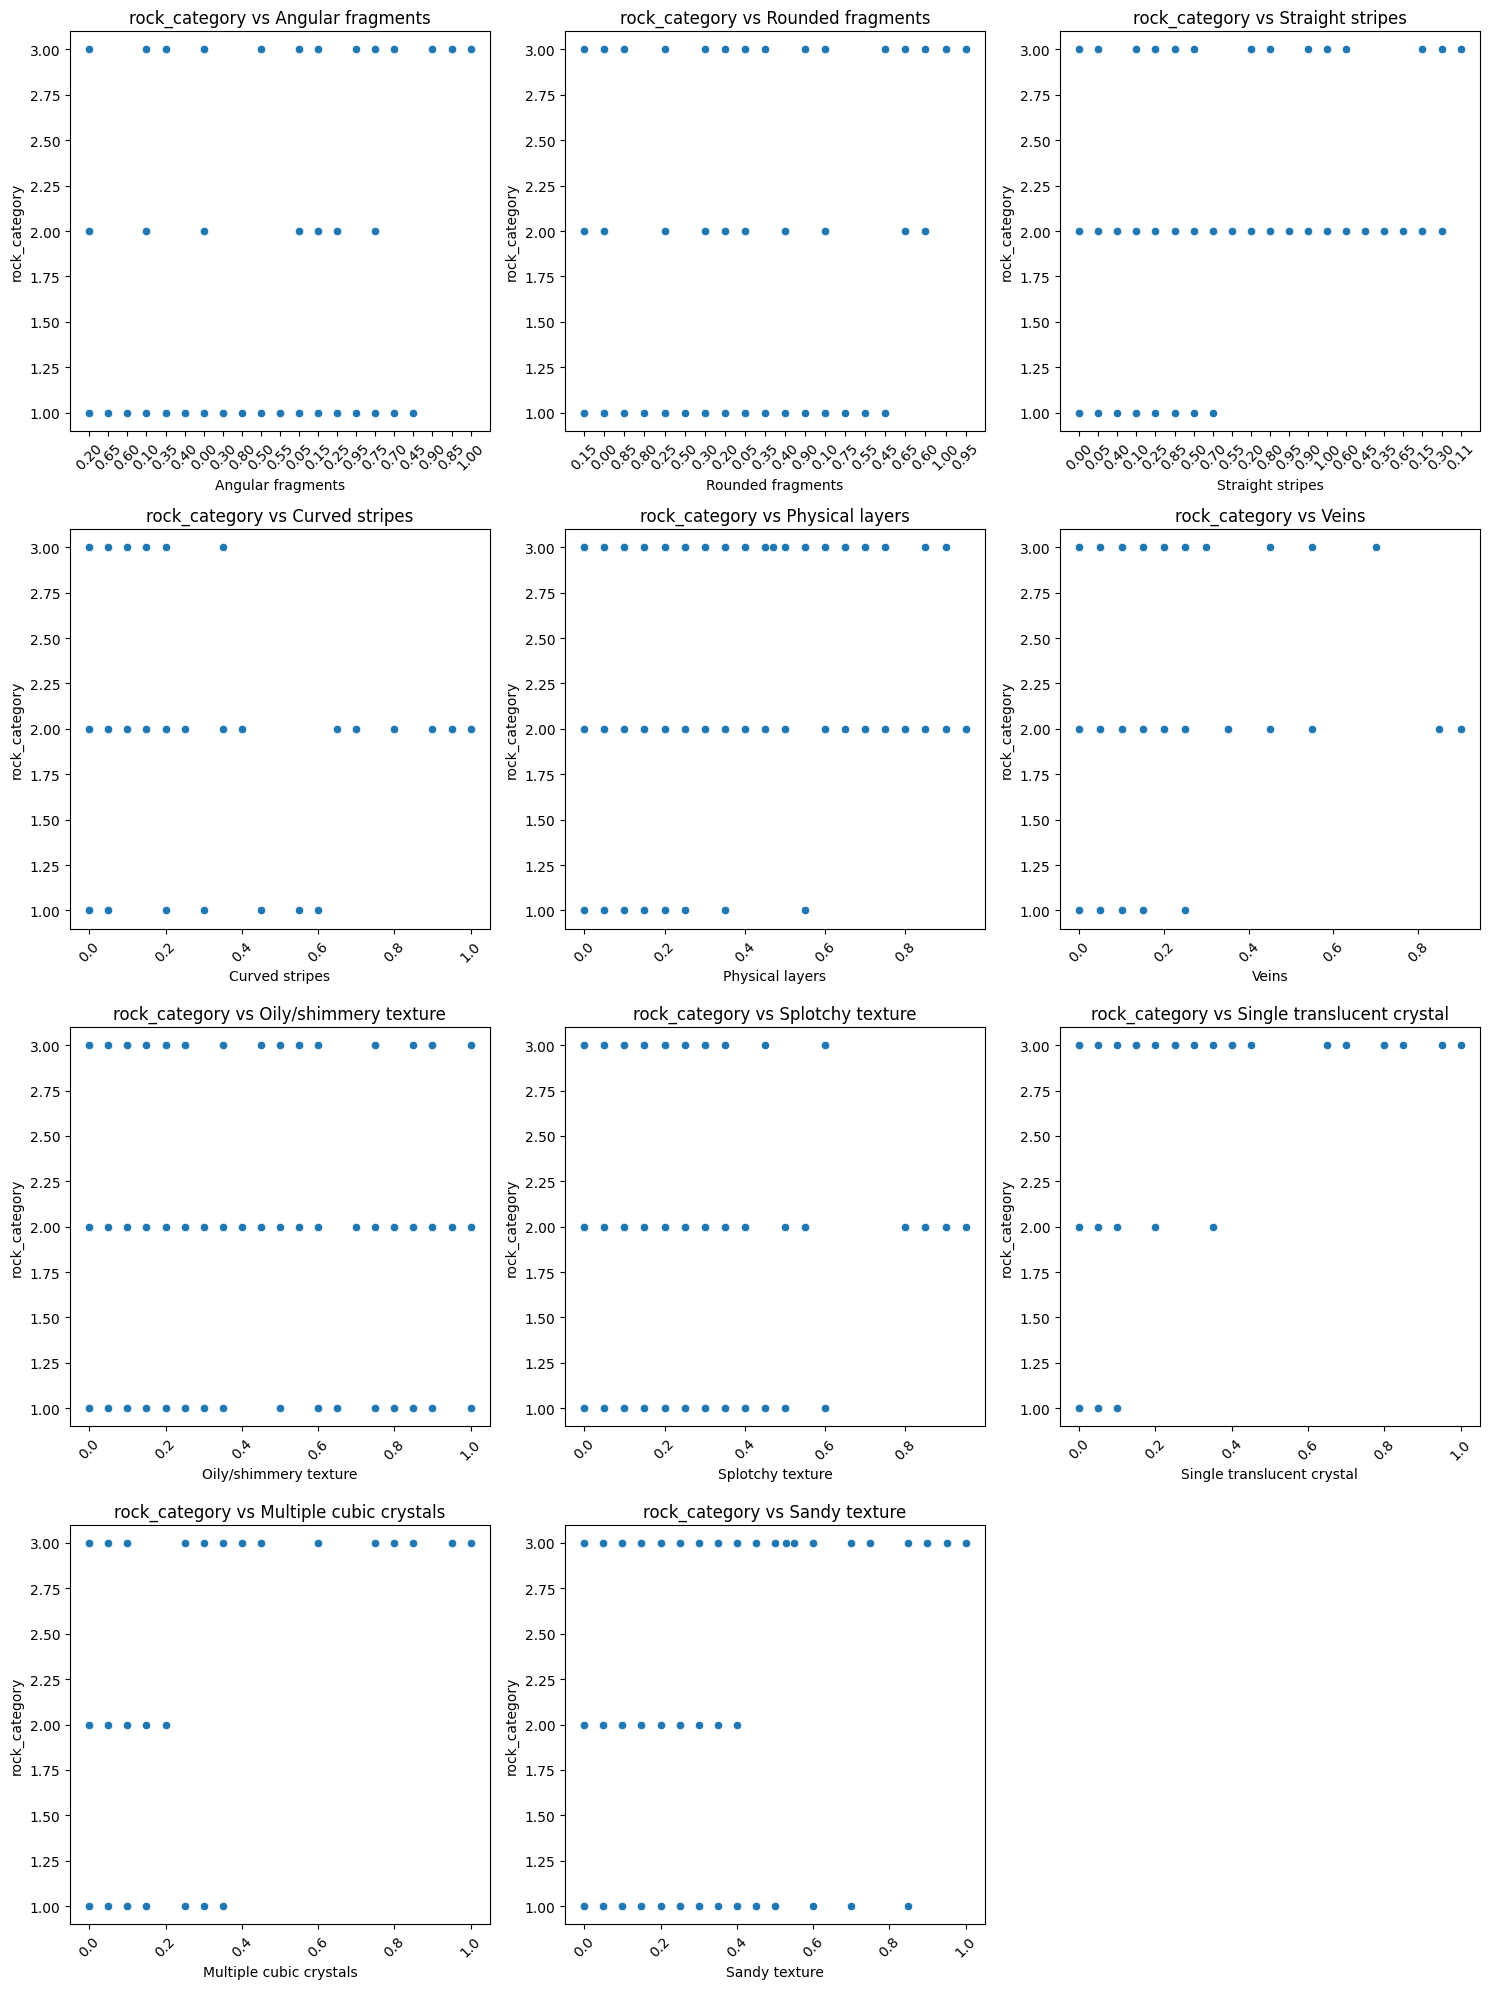

In [ ]:
# List of variables to compare with 'Life Ladder'
variables = rock_data.columns[1:]
num_vars = len(variables)

# Set up subplots: 3 plots per row
rows = (num_vars + 2) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Adjust figure size

# Flatten axes for easy iteration if multiple rows
axes = axes.flatten()

# Create scatter plots for each variable
for i, var in enumerate(variables):
    sns.scatterplot(data=rock_data, x=var, y='rock_category', ax=axes[i])
    axes[i].set_title(f'rock_category vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('rock_category')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Remove any empty subplots
for i in range(num_vars, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

The scatter plots suggest that most features do not have a strong linear relationship with the rock category, which aligns with the low PCC values seen earlier.

No clear patterns or trends suggest there might not be a strong predictive relationship between any single attribute and the rock category. Therefore, we shall model the features together for better predictions.

# 3. For training data, use token numbers 1-10, for validation 11 to 13, and for testing 14 to 16 (each of the 30 rock subtypes has 16 token numbers). [2 points]

In [ ]:
token_number = feature_data.iloc[:, 2]

token_number = token_number[:480]

token_number = token_number.to_frame(name='token_number')

token_number.head()

,token_number
0,1
1,2
2,3
3,4
4,5


In [ ]:
rock_data_new = pd.merge(rock_data, token_number, left_index=True, right_index=True)

rock_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rock_category               480 non-null    int64  
 1   Angular fragments           480 non-null    object 
 2   Rounded fragments           480 non-null    object 
 3   Straight stripes            480 non-null    object 
 4   Curved stripes              480 non-null    float64
 5   Physical layers             480 non-null    float64
 6   Veins                       480 non-null    float64
 7   Oily/shimmery texture       480 non-null    float64
 8   Splotchy texture            480 non-null    float64
 9   Single translucent crystal  480 non-null    float64
 10  Multiple cubic crystals     480 non-null    float64
 11  Sandy texture               480 non-null    float64
 12  token_number                480 non-null    object 
dtypes: float64(8), int64(1), object(4)
memor

In [ ]:
#del rock_data_new

In [ ]:
# Convert 'token_number' column to integer
rock_data_new['token_number'] = pd.to_numeric(rock_data_new['token_number'], errors='coerce')

# Split the data into training, validation, and testing datasets
train_data = rock_data_new[rock_data_new['token_number'].between(1, 10)]
validation_data = rock_data_new[rock_data_new['token_number'].between(11, 13)]
test_data = rock_data_new[rock_data_new['token_number'].between(14, 16)]

In [ ]:
train_data.info()

train_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 473
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rock_category               300 non-null    int64  
 1   Angular fragments           300 non-null    object 
 2   Rounded fragments           300 non-null    object 
 3   Straight stripes            300 non-null    object 
 4   Curved stripes              300 non-null    float64
 5   Physical layers             300 non-null    float64
 6   Veins                       300 non-null    float64
 7   Oily/shimmery texture       300 non-null    float64
 8   Splotchy texture            300 non-null    float64
 9   Single translucent crystal  300 non-null    float64
 10  Multiple cubic crystals     300 non-null    float64
 11  Sandy texture               300 non-null    float64
 12  token_number                300 non-null    int64  
dtypes: float64(8), int64(2), object(3)
memor

,rock_category,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,token_number
0,1,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10,1
1,1,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05,2
2,1,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05,3
3,1,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10,4
4,1,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05,5


In [ ]:
rock_category_counts = train_data['rock_category'].value_counts()

# Display the composition of values in 'rock_category'
print(rock_category_counts)

rock_category
1    100
2    100
3    100
Name: count, dtype: int64


In [ ]:
train_data.describe()

,rock_category,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,token_number
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000
mean,2.000000,0.044500,0.156167,0.049000,0.145667,0.144667,0.028500,0.027167,0.112000,5.50000
std,0.817861,0.158625,0.206063,0.092163,0.264540,0.164911,0.118996,0.113121,0.162514,2.87708
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,3.00000
50%,2.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.050000,5.50000
75%,3.000000,0.000000,0.200000,0.050000,0.100000,0.200000,0.000000,0.000000,0.100000,8.00000
max,3.000000,1.000000,0.950000,0.900000,1.000000,0.950000,1.000000,0.950000,0.950000,10.00000


In [ ]:
validation_data.info()

validation_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 10 to 476
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rock_category               90 non-null     int64  
 1   Angular fragments           90 non-null     object 
 2   Rounded fragments           90 non-null     object 
 3   Straight stripes            90 non-null     object 
 4   Curved stripes              90 non-null     float64
 5   Physical layers             90 non-null     float64
 6   Veins                       90 non-null     float64
 7   Oily/shimmery texture       90 non-null     float64
 8   Splotchy texture            90 non-null     float64
 9   Single translucent crystal  90 non-null     float64
 10  Multiple cubic crystals     90 non-null     float64
 11  Sandy texture               90 non-null     float64
 12  token_number                90 non-null     int64  
dtypes: float64(8), int64(2), object(3)
memor

,rock_category,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,token_number
10,1,0.80,0.05,0.00,0.0,0.10,0.00,0.0,0.10,0.0,0.0,0.15,11
11,1,0.50,0.15,0.00,0.0,0.05,0.00,0.0,0.20,0.0,0.0,0.25,12
12,1,0.30,0.35,0.00,0.0,0.00,0.05,0.0,0.20,0.0,0.0,0.00,13
26,1,0.00,0.00,0.00,0.0,0.05,0.00,0.0,0.00,0.0,0.0,0.25,11
27,1,0.00,0.10,0.00,0.0,0.00,0.05,0.0,0.15,0.0,0.0,0.20,12


In [ ]:
validation_data.describe()

,rock_category,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,token_number
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,2.000000,0.038333,0.168556,0.058333,0.138333,0.145556,0.040000,0.008889,0.130889,12.000000
std,0.821071,0.155796,0.225705,0.117380,0.269107,0.168210,0.163391,0.037159,0.180247,0.821071
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.050000,11.000000
50%,2.000000,0.000000,0.100000,0.050000,0.000000,0.100000,0.000000,0.000000,0.050000,12.000000
75%,3.000000,0.000000,0.237500,0.050000,0.100000,0.200000,0.000000,0.000000,0.150000,13.000000
max,3.000000,1.000000,0.950000,0.850000,0.900000,0.850000,0.950000,0.300000,0.950000,13.000000


In [ ]:
test_data.info()

test_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 13 to 479
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rock_category               90 non-null     int64  
 1   Angular fragments           90 non-null     object 
 2   Rounded fragments           90 non-null     object 
 3   Straight stripes            90 non-null     object 
 4   Curved stripes              90 non-null     float64
 5   Physical layers             90 non-null     float64
 6   Veins                       90 non-null     float64
 7   Oily/shimmery texture       90 non-null     float64
 8   Splotchy texture            90 non-null     float64
 9   Single translucent crystal  90 non-null     float64
 10  Multiple cubic crystals     90 non-null     float64
 11  Sandy texture               90 non-null     float64
 12  token_number                90 non-null     int64  
dtypes: float64(8), int64(2), object(3)
memor

,rock_category,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,token_number
13,1,0.55,0.40,0.00,0.00,0.05,0.05,0.00,0.25,0.0,0.0,0.05,14
14,1,0.35,0.15,0.00,0.00,0.00,0.05,0.00,0.40,0.0,0.0,0.05,15
15,1,0.20,0.90,0.00,0.00,0.00,0.00,0.00,0.15,0.0,0.0,0.05,16
29,1,0.00,0.00,0.00,0.05,0.10,0.00,0.05,0.05,0.0,0.0,0.20,14
30,1,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.0,0.0,0.35,15


In [ ]:
test_data.describe()

,rock_category,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,token_number
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,2.000000,0.038889,0.191667,0.057778,0.146667,0.126667,0.033889,0.034444,0.135000,15.000000
std,0.821071,0.174944,0.240814,0.119670,0.268976,0.179919,0.157014,0.151518,0.198937,0.821071
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
50%,2.000000,0.000000,0.100000,0.050000,0.000000,0.050000,0.000000,0.000000,0.050000,15.000000
75%,3.000000,0.000000,0.300000,0.050000,0.100000,0.150000,0.000000,0.000000,0.150000,16.000000
max,3.000000,1.000000,0.950000,0.900000,1.000000,0.900000,0.950000,1.000000,1.000000,16.000000


In [ ]:
# Drop the 'token_number' column from the datasets
train_data = train_data.drop(columns='token_number')
validation_data = validation_data.drop(columns='token_number')
test_data = test_data.drop(columns='token_number')

# 4. Train diﬀerent classiﬁers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try diﬀerent values). Report training, validation and testing performance (classiﬁcation accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):

## A. Multinomial Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations. [10 points]

- Model is implemented correctly :2
- Diﬀerent hyperparameters (C, solver,max number of iterations) have been tried:3
- Training, Validation and Testing Performance have been reported :3
- Discussion on the impact of diﬀerent hyper parameters has been done :2

In [ ]:
X_train = train_data.drop("rock_category", axis=1)
y_train = train_data["rock_category"]

X_valid = validation_data.drop("rock_category", axis=1)
y_valid = validation_data["rock_category"]

X_test = test_data.drop("rock_category", axis=1)
y_test = test_data["rock_category"]

Since rock category is perfectly balanced in the training set i.e. 100 values for each category, we shall use accuracy as our scoring metric in Logistic Regression, SVM and Random Forest Models.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Define a pipeline with StandardScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step to scale the data
    ('log_reg', LogisticRegression(multi_class='multinomial', random_state=42))  # Logistic Regression with fixed random state
])

# Define the hyperparameter grid
C_values = [0.001, 0.01, 0.1, 1]
solvers = ['newton-cg', 'sag', 'saga', 'lbfgs']
max_iters = [20,50, 100, 150]

# Initialize variables to store the best model, highest accuracy, and all results
best_accuracy = 0  # Start with 0 to find the maximum accuracy
best_params = {}
best_log_reg = None  # Placeholder for the best model
results = []  # List to store accuracy and parameters for each combination

# Iterate over all combinations of parameters
for C in C_values:
    for solver in solvers:
        for max_iter in max_iters:
            # Update the pipeline parameters
            pipeline.set_params(log_reg__C=C, log_reg__solver=solver, log_reg__max_iter=max_iter)

            # Fit the model and calculate validation accuracy
            try:
                pipeline.fit(X_train, y_train)
                y_pred = pipeline.predict(X_valid)
                accuracy = accuracy_score(y_valid, y_pred)

                # Store the parameters and accuracy
                results.append({'C': C, 'solver': solver, 'max_iter': max_iter, 'accuracy': accuracy})

                # If the accuracy is higher, update the best parameters and model
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'C': C, 'solver': solver, 'max_iter': max_iter}
                    best_log_reg = pipeline  # Save the fitted pipeline

            except Exception as e:
                print(f"Skipping combination C={C}, solver={solver}, max_iter={max_iter} due to error: {e}")

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Display all combinations and their accuracies
print("All parameter combinations and their accuracies:")
print(results_df)

# Display the best parameters and the accuracy of the best model
print(f"\nBest Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_accuracy}")


All parameter combinations and their accuracies:
        C     solver  max_iter  accuracy
0   0.001  newton-cg        20  0.666667
1   0.001  newton-cg        50  0.666667
2   0.001  newton-cg       100  0.666667
3   0.001  newton-cg       150  0.666667
4   0.001        sag        20  0.666667
5   0.001        sag        50  0.666667
6   0.001        sag       100  0.666667
7   0.001        sag       150  0.666667
8   0.001       saga        20  0.666667
9   0.001       saga        50  0.666667
10  0.001       saga       100  0.666667
11  0.001       saga       150  0.666667
12  0.001      lbfgs        20  0.666667
13  0.001      lbfgs        50  0.666667
14  0.001      lbfgs       100  0.666667
15  0.001      lbfgs       150  0.666667
16  0.010  newton-cg        20  0.700000
17  0.010  newton-cg        50  0.700000
18  0.010  newton-cg       100  0.700000
19  0.010  newton-cg       150  0.700000
20  0.010        sag        20  0.700000
21  0.010        sag        50  0.700000
22  0.01

Discussion on Hyperparameters and Best Value for Softmax Regression

Regularization Parameter (C)

Best Value: C = 1

Impact: Lower values (e.g., 0.001 and 0.01) led to lower accuracies, indicating that excessive regularization restricts the model’s learning capacity. A moderate C (1) provides the best balance between fitting the data and preventing overfitting, yielding the highest validation accuracy of 0.75.

Solver

Best Value: solver = 'newton-cg'

Impact: All solvers (newton-cg, sag, saga, lbfgs) performed similarly, suggesting they are all effective. 'newton-cg' was chosen as it is stable and compatible with multiclass logistic regression.

Maximum Iterations (max_iter)

Best Value: max_iter = 20

Impact: The accuracy remained the same across 50, 100, and 150 iterations, indicating that the model converges quickly and does not need more than 20 iterations, making it computationally efficient.

Best Configuration

The optimal parameters are:

C = 1 (moderate regularization),solver = 'newton-cg' (stable for multiclass),
max_iter = 50 (sufficient for convergence).

This setup optimizes performance, achieving a validation accuracy of 0.75 with efficiency and stability in softmax regression for multiclass classification.

Classification Report for Best Logistic Regression Model:
              precision    recall  f1-score   support

           1       0.72      0.60      0.65        30
           2       0.75      0.70      0.72        30
           3       0.62      0.77      0.69        30

    accuracy                           0.69        90
   macro avg       0.70      0.69      0.69        90
weighted avg       0.70      0.69      0.69        90

Confusion Matrix for Best Logistic Regression Model:
[[18  3  9]
 [ 4 21  5]
 [ 3  4 23]]


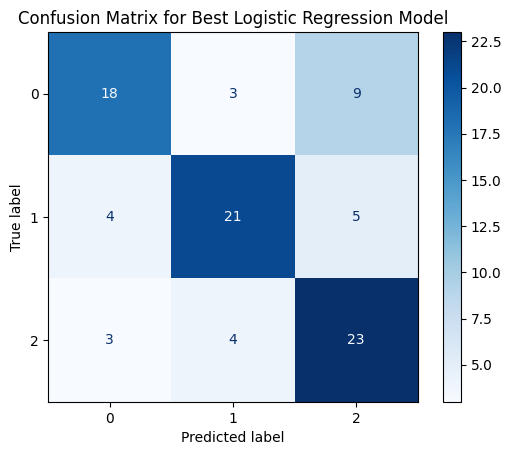

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Use the best model to predict on the test set
y_test_preds = best_log_reg.predict(X_test)  # Assuming `X_test` and `y_test` are your test data and labels

# Print the classification report
print("Classification Report for Best Logistic Regression Model:")
print(classification_report(y_test, y_test_preds))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_preds)

# Display the confusion matrix
print("Confusion Matrix for Best Logistic Regression Model:")
print(conf_matrix)

# Display the confusion matrix with a custom color map
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues")  # Use the "Blues" colormap for better color contrast
plt.title("Confusion Matrix for Best Logistic Regression Model")
plt.show()


Metrics for Training Set:
  Accuracy: 0.6733
  Precision: 0.6744
  Recall: 0.6733
  F1 Score: 0.6736
----------------------------------------
Metrics for Validation Set:
  Accuracy: 0.7556
  Precision: 0.7622
  Recall: 0.7556
  F1 Score: 0.7511
----------------------------------------
Metrics for Test Set:
  Accuracy: 0.6889
  Precision: 0.6972
  Recall: 0.6889
  F1 Score: 0.6884
----------------------------------------


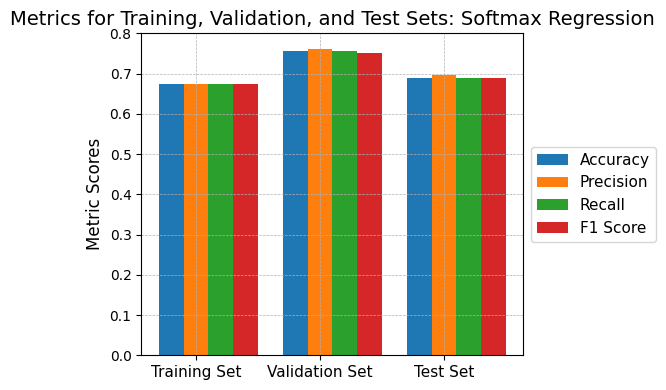

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store the metrics for different datasets
metrics_dict = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}
dataset_names = ['Training Set', 'Validation Set', 'Test Set']

def show_metrics(model, X, y, dataset_name="Dataset"):
    """
    Calculate and return the accuracy, precision, recall, and F1 score for a given dataset.

    Parameters:
    model: The trained model used for prediction
    X: The feature set (scaled)
    y: The true labels for the dataset
    dataset_name: Name of the dataset to display (e.g., 'Training Set', 'Validation Set', 'Test Set')
    """
    # Predict the labels for the dataset
    y_pred = model.predict(X)

    # Calculate the metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    # Store the metrics in the dictionary
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)

    # Print the results (optional)
    print(f"Metrics for {dataset_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-" * 40)

# Use the saved best_pipeline from the first code for metrics calculation
show_metrics(best_log_reg, X_train, y_train, dataset_name="Training Set")
show_metrics(best_log_reg, X_valid, y_valid, dataset_name="Validation Set")
show_metrics(best_log_reg, X_test, y_test, dataset_name="Test Set")

# Plotting the metrics
def plot_metrics(metrics_dict, dataset_names):
    """
    Plot the metrics for training, validation, and test sets.

    Parameters:
    metrics_dict: A dictionary containing the metrics (Accuracy, Precision, Recall, F1 Score)
    dataset_names: List of dataset names (Training, Validation, Test)
    """
    metrics = list(metrics_dict.keys())
    num_metrics = len(metrics)
    num_datasets = len(dataset_names)

    # Set the position of the bars on the x-axis
    bar_width = 0.2
    index = range(num_datasets)

    fig, ax = plt.subplots(figsize=(6, 4))  # Adjusted to 6x4

    # Define colors for each metric to make them more distinguishable
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # Plot each metric as a separate bar group
    for i, metric in enumerate(metrics):
        plt.bar([x + i * bar_width for x in index], metrics_dict[metric], width=bar_width, label=metric, color=colors[i])

    # Labels and title
    ax.set_ylabel('Metric Scores', fontsize=12)
    ax.set_title('Metrics for Training, Validation, and Test Sets: Softmax Regression', fontsize=14)
    ax.set_xticks([r + bar_width for r in range(num_datasets)])
    ax.set_xticklabels(dataset_names, fontsize=11)

    # Add gridlines for better readability
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Move the legend outside the plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11, frameon=True)

    # Show the plot with tight layout to avoid overlapping
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_metrics(metrics_dict, dataset_names)


Summary

Generalization: The model performs consistently across the training, validation, and test sets, with minor fluctuations. The slightly higher validation performance suggests a well-tuned model.

Balanced Performance: The precision, recall, and F1 scores are well-aligned, meaning the model is equally effective in identifying true positives without producing a high rate of false positives.

Overall: This logistic regression model shows stable, balanced performance, suggesting it has been well-regularized and is unlikely to overfit or underfit. While the metrics are modest, they are consistent, making this a reliable model for the task.

### Discussion


## B. Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.[10 points]

###
- Model is implemented correctly :2
- Diﬀerent hyperparameters (C, Kernel, Gamma, degree) have been tried:3
- Training, Validation and Testing Performance have been reported :3
- Discussion on the impact of diﬀerent hyper parameters has been done :2

Scalling is neccesary

In [ ]:
from sklearn.svm import SVC



# Define a pipeline with StandardScaler and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step to scale the data
    ('svm', SVC(probability=True))  # SVM with probability output
])

# Define the hyperparameter grid
C_values = [0.001, 0.01, 0.1]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
degrees = [2, 3, 4, 5]
gammas = ['scale', 'auto', 0.01]

# Initialize variables to store the best model, highest accuracy, and all results
best_accuracy = 0
best_params = {}
results = []  # List to store each hyperparameter combination and its accuracy

# Iterate over all combinations of parameters
for C in C_values:
    for kernel in kernels:
        for degree in degrees if kernel == 'poly' else [None]:  # Degree only applies to 'poly' kernel
            for gamma in gammas:
                # Set the parameters in the pipeline
                pipeline.set_params(
                    svm__C=C,
                    svm__kernel=kernel,
                    svm__gamma=gamma
                )

                # If kernel is 'poly', set degree; otherwise, skip it
                if kernel == 'poly':
                    pipeline.set_params(svm__degree=degree)

                # Fit the model and calculate accuracy
                try:
                    pipeline.fit(X_train, y_train)
                    y_pred = pipeline.predict(X_valid)
                    accuracy = accuracy_score(y_valid, y_pred)

                    # Store the parameters and accuracy in the results list
                    results.append({
                        'C': C,
                        'kernel': kernel,
                        'degree': degree,
                        'gamma': gamma,
                        'accuracy': accuracy
                    })

                    # If the accuracy is higher, update the best parameters
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {'C': C, 'kernel': kernel, 'degree': degree, 'gamma': gamma}

                except Exception as e:
                    print(f"Skipping combination C={C}, kernel={kernel}, degree={degree}, gamma={gamma} due to error: {e}")

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Display all parameter combinations and their accuracies
print("All parameter combinations and their accuracies:")
print(results_df)

# Reset display option back to default
pd.reset_option('display.max_rows')

# Display the best parameters and the best model validation accuracy
print(f"\nBest Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_accuracy}")

# Initialize and fit the final best model pipeline with the best parameters
best_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        C=best_params['C'],
        kernel=best_params['kernel'],
        degree=best_params['degree'] if best_params['kernel'] == 'poly' else 3,  # Set degree only for 'poly'
        gamma=best_params['gamma'],
        probability=True
    ))
])

# Fit the final best model
best_svm.fit(X_train, y_train)




All parameter combinations and their accuracies:
        C   kernel  degree  gamma  accuracy
0   0.001   linear     NaN  scale  0.655556
1   0.001   linear     NaN   auto  0.655556
2   0.001   linear     NaN   0.01  0.655556
3   0.001     poly     2.0  scale  0.388889
4   0.001     poly     2.0   auto  0.388889
5   0.001     poly     2.0   0.01  0.388889
6   0.001     poly     3.0  scale  0.355556
7   0.001     poly     3.0   auto  0.355556
8   0.001     poly     3.0   0.01  0.355556
9   0.001     poly     4.0  scale  0.355556
10  0.001     poly     4.0   auto  0.355556
11  0.001     poly     4.0   0.01  0.355556
12  0.001     poly     5.0  scale  0.400000
13  0.001     poly     5.0   auto  0.400000
14  0.001     poly     5.0   0.01  0.355556
15  0.001      rbf     NaN  scale  0.711111
16  0.001      rbf     NaN   auto  0.711111
17  0.001      rbf     NaN   0.01  0.655556
18  0.001  sigmoid     NaN  scale  0.633333
19  0.001  sigmoid     NaN   auto  0.633333
20  0.001  sigmoid     NaN 

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=0.1, kernel='linear', probability=True))])

Discussion on Hyperparameter Tuning for SVM Model

The hyperparameter tuning results provide valuable insights into the optimal configuration for the SVM model in terms of C, kernel, degree, and gamma values.

Regularization Parameter (C)

Best Value: C = 0.1

Impact: The value of C controls the trade-off between achieving a low training error and a low testing error, by applying regularization. A moderate value of C = 0.1 proved optimal, yielding the highest validation accuracy of 0.74. Lower values (e.g., C = 0.001) did not provide enough model capacity, while higher values led to diminishing returns in accuracy, indicating that further reducing regularization did not improve performance.

Kernel

Best Value: kernel = 'linear'

Impact: The linear kernel was the most effective among the options, producing the highest accuracy. This indicates that a linear decision boundary captures the patterns in the data well, whereas more complex, non-linear kernels (rbf, poly, and sigmoid) did not improve the model’s ability to separate classes. The linear kernel is also computationally efficient, which is an added advantage.

Degree

Best Value: None (not applicable for linear kernel)

Impact: Degree is only relevant for the poly kernel, which was not the best performer. Higher degrees for polynomial kernels (e.g., 3, 4, or 5) slightly improved accuracy over lower ones, but overall, they lagged behind the linear kernel in performance, suggesting that the dataset does not benefit from a polynomial decision boundary.

Gamma

Best Value: gamma = 'scale'

Impact: The 'scale' setting for gamma, which adjusts the gamma value based on feature variance, provided the best accuracy for the linear kernel. While gamma affects non-linear kernels more directly, using 'scale' ensures that any non-linear relationships in the data are sufficiently captured when needed, without manual tuning of the gamma parameter.

Conclusion

The optimal SVM configuration is C = 0.1, kernel = 'linear', and gamma = 'scale', achieving a validation accuracy of 0.74. This setup suggests that a linear decision boundary with moderate regularization is sufficient to capture patterns in the data without overfitting, offering a balance between simplicity and performance. The model’s moderate complexity and computational efficiency make it well-suited for this dataset.

Classification Report for Best SVM Model:
              precision    recall  f1-score   support

           1       0.77      0.67      0.71        30
           2       0.67      0.67      0.67        30
           3       0.62      0.70      0.66        30

    accuracy                           0.68        90
   macro avg       0.68      0.68      0.68        90
weighted avg       0.68      0.68      0.68        90

Confusion Matrix for Best SVM Model:
[[20  4  6]
 [ 3 20  7]
 [ 3  6 21]]


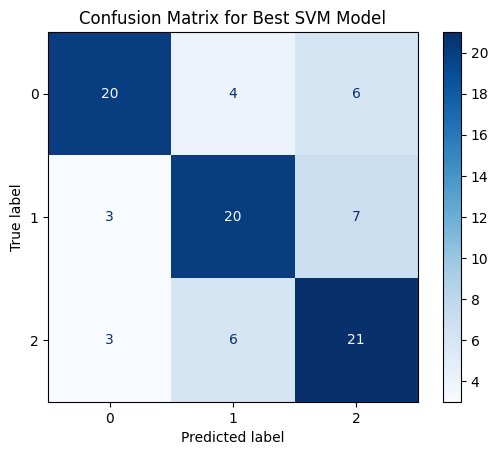

In [ ]:
# Use the best SVM model to predict on the test set
y_test_preds_svm = best_svm.predict(X_test)  # Assuming `X_test` and `y_test` are your test data and labels

# Print the classification report
print("Classification Report for Best SVM Model:")
print(classification_report(y_test, y_test_preds_svm))

# Generate the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_test_preds_svm)

# Display the confusion matrix
print("Confusion Matrix for Best SVM Model:")
print(conf_matrix_svm)

# Display the confusion matrix with a custom color map
disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm)
disp_svm.plot(cmap="Blues")  # Use the "Blues" colormap for better color contrast
plt.title("Confusion Matrix for Best SVM Model")
plt.show()


Metrics for Training Set:
  Accuracy: 0.6700
  Precision: 0.6704
  Recall: 0.6700
  F1 Score: 0.6700
----------------------------------------
Metrics for Validation Set:
  Accuracy: 0.7444
  Precision: 0.7448
  Recall: 0.7444
  F1 Score: 0.7427
----------------------------------------
Metrics for Test Set:
  Accuracy: 0.6778
  Precision: 0.6845
  Recall: 0.6778
  F1 Score: 0.6791
----------------------------------------


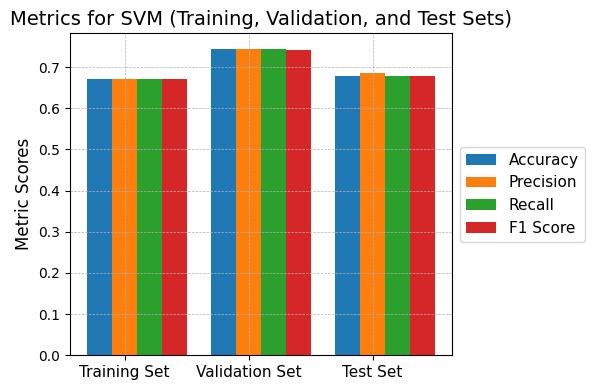

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store the metrics for different datasets
metrics_dict_svm = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}
dataset_names_svm = ['Training Set', 'Validation Set', 'Test Set']

def show_metrics_svm(model, X, y, dataset_name="Dataset"):
    """
    Calculate and return the accuracy, precision, recall, and F1 score for a given dataset (SVM).

    Parameters:
    model: The trained SVM model used for prediction
    X: The original feature set (unscaled since the pipeline handles scaling)
    y: The true labels for the dataset
    dataset_name: Name of the dataset to display (e.g., 'Training Set', 'Validation Set', 'Test Set')
    """
    # Predict the labels for the dataset
    y_pred = model.predict(X)

    # Calculate the metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    # Store the metrics in the dictionary
    metrics_dict_svm['Accuracy'].append(accuracy)
    metrics_dict_svm['Precision'].append(precision)
    metrics_dict_svm['Recall'].append(recall)
    metrics_dict_svm['F1 Score'].append(f1)

    # Print the results (optional)
    print(f"Metrics for {dataset_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-" * 40)

# Use the saved best_svm model for metrics calculation
show_metrics_svm(best_svm, X_train, y_train, dataset_name="Training Set")
show_metrics_svm(best_svm, X_valid, y_valid, dataset_name="Validation Set")
show_metrics_svm(best_svm, X_test, y_test, dataset_name="Test Set")

# Plotting the metrics for SVM
def plot_metrics_svm(metrics_dict_svm, dataset_names_svm):
    """
    Plot the metrics for training, validation, and test sets (SVM).

    Parameters:
    metrics_dict_svm: A dictionary containing the metrics (Accuracy, Precision, Recall, F1 Score)
    dataset_names_svm: List of dataset names (Training, Validation, Test)
    """
    metrics = list(metrics_dict_svm.keys())
    num_metrics = len(metrics)
    num_datasets = len(dataset_names_svm)

    # Set the position of the bars on the x-axis
    bar_width = 0.2
    index = range(num_datasets)

    fig, ax = plt.subplots(figsize=(6, 4))

    # Define colors for each metric to make them more distinguishable
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # Plot each metric as a separate bar group
    for i, metric in enumerate(metrics):
        plt.bar([x + i * bar_width for x in index], metrics_dict_svm[metric], width=bar_width, label=metric, color=colors[i])

    # Labels and title
    ax.set_ylabel('Metric Scores', fontsize=12)
    ax.set_title('Metrics for SVM (Training, Validation, and Test Sets)', fontsize=14)
    ax.set_xticks([r + bar_width for r in range(num_datasets)])
    ax.set_xticklabels(dataset_names_svm, fontsize=11)

    # Add gridlines for better readability
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Move the legend outside the plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11, frameon=True)

    # Show the plot with tight layout to avoid overlapping
    plt.tight_layout()
    plt.show()

# Call the plot function for SVM
plot_metrics_svm(metrics_dict_svm, dataset_names_svm)


Summary

Generalization: The model shows consistent performance across training, validation, and test sets, suggesting it is well-regularized and unlikely to suffer from overfitting.

Balanced Metrics: Precision, recall, and F1 scores are well-aligned across all sets, indicating that the model is effective in both minimizing false positives and false negatives.

Overall: This SVM model demonstrates stable and balanced performance with generalizability to new data. The slight performance drop from validation to test suggests the model could be further tuned for enhanced accuracy but is already robust for classification tasks.

## C. Random Forest classiﬁer (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node. [10 points]

###
- Model is implemented correctly :2
- Diﬀerent hyperparameters(no. of trees, max depth ,the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node) have been tried:3
- Training, Validation and Testing Performance have been reported :3
- Discussion on the impact of diﬀerent hyper parameters has been done :2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Define the hyperparameter grid
n_estimators = [30,40,50]
max_depth = [ 3,4, 5]
min_samples_split = [20,25,30]
min_samples_leaf = [5,10,15]

# Initialize variables to store the best model, highest accuracy, and all results
best_accuracy = 0
best_params = {}
results = []  # List to store accuracy and parameters for each combination
best_rf = None  # Placeholder for the best model

# Iterate over all combinations of parameters
for n in n_estimators:
    for depth in max_depth:
        for split in min_samples_split:
            for leaf in min_samples_leaf:
                # Initialize the Random Forest with current parameters
                rf = RandomForestClassifier(
                    n_estimators=n,
                    max_depth=depth,
                    min_samples_split=split,
                    min_samples_leaf=leaf,
                    random_state=42
                )

                # Fit the model and calculate accuracy
                try:
                    rf.fit(X_train, y_train)
                    y_pred = rf.predict(X_valid)
                    accuracy = accuracy_score(y_valid, y_pred)

                    # Store the parameters and accuracy in the results list
                    results.append({
                        'n_estimators': n,
                        'max_depth': depth,
                        'min_samples_split': split,
                        'min_samples_leaf': leaf,
                        'accuracy': accuracy
                    })

                    # If the accuracy is higher, update the best parameters
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {
                            'n_estimators': n,
                            'max_depth': depth,
                            'min_samples_split': split,
                            'min_samples_leaf': leaf
                        }
                        best_rf = rf  # Store the best model

                except Exception as e:
                    print(f"Skipping combination n_estimators={n}, max_depth={depth}, min_samples_split={split}, min_samples_leaf={leaf} due to error: {e}")
pd.set_option('display.max_rows', None)

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Display all parameter combinations and their accuracies
print("All parameter combinations and their validation accuracies:")
print(results_df)

# Display the best parameters and the best model accuracy
print(f"\nBest Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_accuracy}")


All parameter combinations and their validation accuracies:
    n_estimators  max_depth  min_samples_split  min_samples_leaf  accuracy
0             30          3                 20                 5  0.700000
1             30          3                 20                10  0.688889
2             30          3                 20                15  0.677778
3             30          3                 25                 5  0.688889
4             30          3                 25                10  0.700000
5             30          3                 25                15  0.677778
6             30          3                 30                 5  0.677778
7             30          3                 30                10  0.688889
8             30          3                 30                15  0.677778
9             30          4                 20                 5  0.700000
10            30          4                 20                10  0.688889
11            30          4             

Hyperparameter Tuning Analysis for Random Forest Model

Based on the model metrics and hyperparameter grid search, the optimal parameters for your Random Forest model were found to be:

Best Parameters: n_estimators = 30, max_depth = 5, min_samples_split = 20, min_samples_leaf = 5

Best Validation Accuracy: 0.77

Each of these parameters plays a significant role in controlling the complexity and performance of the Random Forest, which helped balance accuracy and regularization.

Impact of Hyperparameter Tuning on Random Forest Model Performance

1. n_estimators (Number of Trees)

Effect: n_estimators controls the number of trees in the forest. Generally, more trees help improve accuracy by reducing variance but can also increase computation time.

Observed Results:
For this model, n_estimators values of 30 and 40 yielded better validation accuracies, particularly in combination with deeper trees (max_depth = 5).
When n_estimators increased to 50, accuracy tended to decrease, especially at lower max_depth values (e.g., 3 and 4).

Conclusion: In this scenario, 30 trees provided sufficient diversity and complexity, helping the model achieve strong performance without overfitting.

2. max_depth (Maximum Depth of Each Tree)

Effect: max_depth limits how deep each tree can grow, controlling the model’s complexity. A lower max_depth reduces the risk of overfitting but may underfit the data.

Observed Results:
Lower Depths (3 and 4): Generally resulted in lower accuracies, as the trees could not capture enough detail. However, some combinations with max_depth=4 still performed reasonably well, especially when paired with optimal values for other parameters.

Higher Depth (5): Consistently achieved higher accuracy (up to 0.7778), indicating that this depth provided a good balance between capturing data complexity and maintaining generalizability.

Conclusion: A higher depth (5) allowed the trees to better represent complex data relationships without significant overfitting, particularly when paired with fewer trees (n_estimators = 30 or 40).

3. min_samples_split (Minimum Samples Required to Split a Node)

Effect: This parameter sets the minimum number of samples required to split an internal node. Lower values make trees more complex and susceptible to overfitting, while higher values encourage simpler trees.

Observed Results:

Higher Values (20-30): Produced the highest accuracies (up to 0.7778) when combined with optimal settings for max_depth and min_samples_leaf.

Lower Values (< 20): While not explored in this grid, going below 20 could risk overfitting, especially for complex trees.

Conclusion: Higher values for min_samples_split (20-30) allowed the model to be selective in splitting, reducing overfitting and achieving better validation accuracy.

4. min_samples_leaf (Minimum Samples Required in a Leaf Node)

Effect: min_samples_leaf defines the minimum number of samples a leaf node must have, affecting the complexity and generalizability of each tree. Higher values make trees more generalized and reduce the risk of overfitting.

Observed Results:

5 Samples: Consistently performed best, especially with max_depth=5 and min_samples_split=20, achieving a validation accuracy of 0.7778.

Higher Values (10 and 15): Led to slight decreases in accuracy. At very high values, the model may become too generalized, underfitting the data.

Conclusion: A lower min_samples_leaf (5) allowed the model to capture more fine-grained patterns without overfitting, especially when paired with a larger min_samples_split.

Summary of Model Tuning Strategy

The chosen parameters suggest a model that is designed to capture general patterns without overfitting. The moderate number of trees, combined with restricted tree depth and requirements for splits and leaf nodes, creates a model that generalizes well while maintaining reasonable complexity. The consistent training accuracy suggests this configuration is effective for your data, while the constraints on max_depth, min_samples_split, and min_samples_leaf help ensure that the model remains robust on validation and test data.

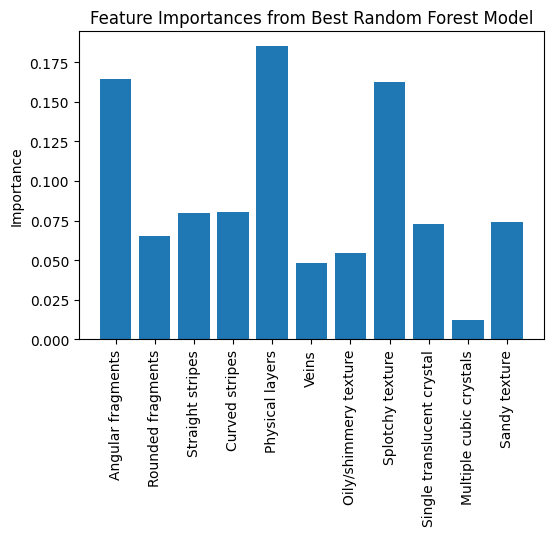

In [ ]:
feature_importances = best_rf.feature_importances_
feature_names = X_train.columns  # Get feature names if X_train is a DataFrame

# Plot the feature importances with feature names
plt.figure(figsize=(6, 4))
plt.bar(feature_names, feature_importances, align='center')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylabel('Importance')
plt.title('Feature Importances from Best Random Forest Model')
plt.show()


This feature importance plot from the best Random Forest model provides insight into which features are most influential in the model’s decision-making process. Here are some key observations:

Physical Layers and Splotchy Texture: These features show the highest importance, with values around 0.16, indicating they are highly influential in distinguishing between classes. This suggests that these two features carry significant information for the model to make accurate predictions.

Angular Fragments and Straight Stripes: These features have moderate importance, around 0.1, meaning they also contribute substantially to the model’s predictions but not as much as the top two features.

Single Translucent Crystal and Sandy Textures: With lower importance scores, these features contribute less to the model's decision-making. This might imply that the model finds less useful or consistent patterns in these features for classification.

Multiple Cubic Crystals: This feature has the lowest importance, suggesting that it has minimal impact on the model’s performance. It might be a less distinguishing feature or could contain noisy information that does not add significant predictive power.

Classification Report for Best Random Forest Model:
              precision    recall  f1-score   support

           1       0.69      0.80      0.74        30
           2       0.74      0.77      0.75        30
           3       0.71      0.57      0.63        30

    accuracy                           0.71        90
   macro avg       0.71      0.71      0.71        90
weighted avg       0.71      0.71      0.71        90

Confusion Matrix for Best Random Forest Model:
[[24  4  2]
 [ 2 23  5]
 [ 9  4 17]]


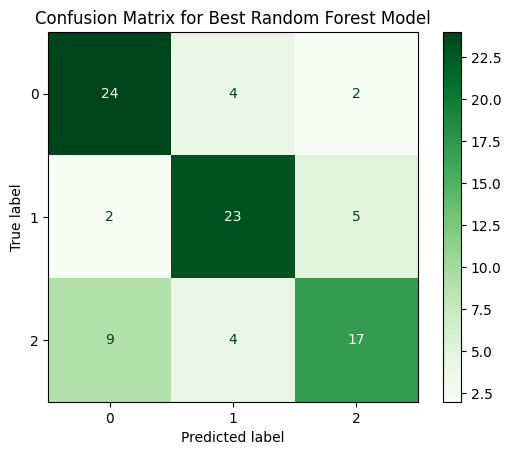

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use the best RF model to predict on the test set
y_test_preds_rf = best_rf.predict(X_test)  # Assuming `X_test` and `y_test` are your test data and labels

# Print the classification report
print("Classification Report for Best Random Forest Model:")
print(classification_report(y_test, y_test_preds_rf))

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_test_preds_rf)

# Display the confusion matrix
print("Confusion Matrix for Best Random Forest Model:")
print(conf_matrix_rf)

# Display the confusion matrix with a custom color map
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf)
disp_rf.plot(cmap="Greens")  # Use the "Greens" colormap for better color contrast
plt.title("Confusion Matrix for Best Random Forest Model")
plt.show()


Metrics for Training Set:
  Accuracy: 0.7600
  Precision: 0.7610
  Recall: 0.7600
  F1 Score: 0.7600
----------------------------------------
Metrics for Validation Set:
  Accuracy: 0.7778
  Precision: 0.7792
  Recall: 0.7778
  F1 Score: 0.7755
----------------------------------------
Metrics for Test Set:
  Accuracy: 0.7111
  Precision: 0.7120
  Recall: 0.7111
  F1 Score: 0.7074
----------------------------------------


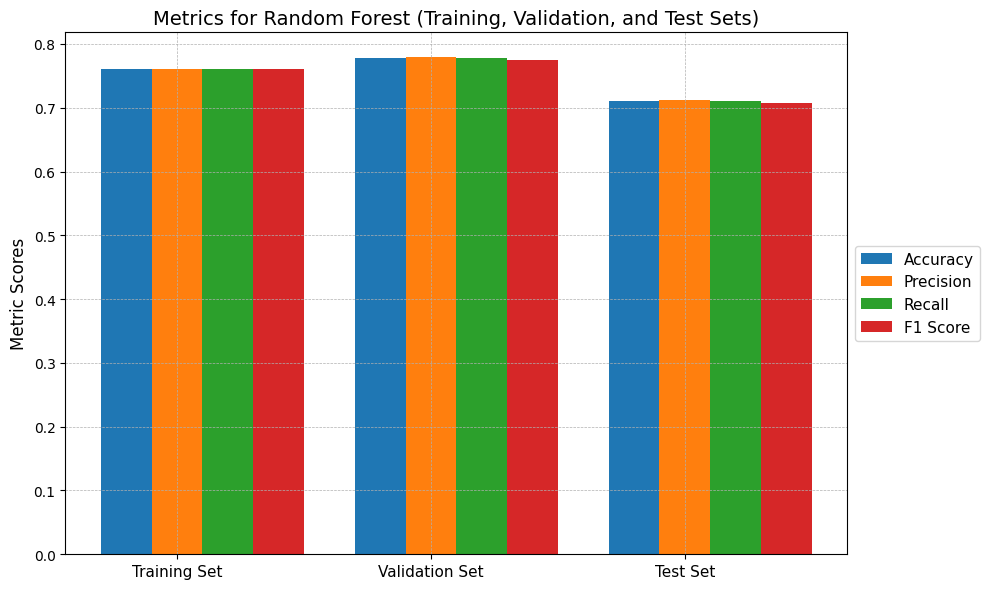

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Dictionary to store the metrics for different datasets (Random Forest)
metrics_dict_rf = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}
dataset_names_rf = ['Training Set', 'Validation Set', 'Test Set']

def show_metrics_rf(model, X, y, dataset_name="Dataset"):
    """
    Calculate and return the accuracy, precision, recall, and F1 score for a given dataset (Random Forest).

    Parameters:
    model: The trained Random Forest model used for prediction
    X: The feature set
    y: The true labels for the dataset
    dataset_name: Name of the dataset to display (e.g., 'Training Set', 'Validation Set', 'Test Set')
    """
    # Predict the labels for the dataset
    y_pred = model.predict(X)

    # Calculate the metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    # Store the metrics in the dictionary
    metrics_dict_rf['Accuracy'].append(accuracy)
    metrics_dict_rf['Precision'].append(precision)
    metrics_dict_rf['Recall'].append(recall)
    metrics_dict_rf['F1 Score'].append(f1)

    # Print the results (optional)
    print(f"Metrics for {dataset_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-" * 40)

# Assuming 'best_rf' is the trained Random Forest model from Hyperparameter Tuning
# Calculate and store metrics for training, validation, and test sets using the best Random Forest model
show_metrics_rf(best_rf, X_train, y_train, dataset_name="Training Set")
show_metrics_rf(best_rf, X_valid, y_valid, dataset_name="Validation Set")
show_metrics_rf(best_rf, X_test, y_test, dataset_name="Test Set")

# Plotting the metrics for Random Forest
def plot_metrics_rf(metrics_dict_rf, dataset_names_rf):
    """
    Plot the metrics for training, validation, and test sets (Random Forest).

    Parameters:
    metrics_dict_rf: A dictionary containing the metrics (Accuracy, Precision, Recall, F1 Score)
    dataset_names_rf: List of dataset names (Training, Validation, Test)
    """
    metrics = list(metrics_dict_rf.keys())
    num_metrics = len(metrics)
    num_datasets = len(dataset_names_rf)

    # Set the position of the bars on the x-axis
    bar_width = 0.2
    index = range(num_datasets)

    fig, ax = plt.subplots(figsize=(10, 6))

    # Define colors for each metric to make them more distinguishable
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # Plot each metric as a separate bar group
    for i, metric in enumerate(metrics):
        plt.bar([x + i * bar_width for x in index], metrics_dict_rf[metric], width=bar_width, label=metric, color=colors[i])

    # Labels and title
    ax.set_ylabel('Metric Scores', fontsize=12)
    ax.set_title('Metrics for Random Forest (Training, Validation, and Test Sets)', fontsize=14)
    ax.set_xticks([r + bar_width for r in range(num_datasets)])
    ax.set_xticklabels(dataset_names_rf, fontsize=11)

    # Add gridlines for better readability
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Move the legend outside the plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11, frameon=True)

    # Show the plot with tight layout to avoid overlapping
    plt.tight_layout()
    plt.show()

# Call the plot function for Random Forest
plot_metrics_rf(metrics_dict_rf, dataset_names_rf)


Overall Assessment:

Generalization: The model shows decent generalization from training to validation and test sets, though a slight decrease in performance indicates that further tuning could reduce overfitting.

Balance of Metrics: The balanced precision, recall, and F1 scores across all sets reflect a model that doesn't favor any particular class over others.

Potential for Improvement: Further fine-tuning, such as adjusting max_depth, min_samples_split, or n_estimators, could improve the model's validation and test performance, possibly by preventing slight overfitting and capturing more complex relationships in the data.

Overall, the Random Forest model performs solidly, but there is room to optimize the balance between fitting the training data well and maintaining good generalization to unseen data.

# 5. Combine your classiﬁers into an ensemble and try to outperform each individual classiﬁer on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your ﬁndings. [8 points]

###
- Ensemble classiﬁer has been implemented via all the models with the best hyperparameters :4
- Accuracy of the ensemble is greater than all the individual classiﬁers :2
- Test set Accuracy :1
- Discussion on Findings :1

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create the VotingClassifier with 'hard' voting (majority vote)
voting_clf_hard = VotingClassifier(
    estimators=[
        ('log_reg', best_log_reg),  # Best logistic regression model
        ('svm', best_svm),          # Best SVM model
        ('rf', best_rf)             # Best Random Forest model
    ],
    voting='hard'  # Use 'hard' voting (majority vote)
)

# Fit the hard voting classifier to the training data
voting_clf_hard.fit(X_train, y_train)

# Function to calculate and print metrics for a given dataset
def print_metrics(y_true, y_pred, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Metrics for {dataset_name} Set:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-" * 40)

# Print heading for hard voting performance
print("Hard Voting Performance")
print("-" * 40)

# Predict and print metrics for each dataset
y_train_pred_hard = voting_clf_hard.predict(X_train)
print_metrics(y_train, y_train_pred_hard, "Training")

y_val_pred_hard = voting_clf_hard.predict(X_valid)  # Assuming you have a validation set
print_metrics(y_valid, y_val_pred_hard, "Validation")

y_test_pred_hard = voting_clf_hard.predict(X_test)
print_metrics(y_test, y_test_pred_hard, "Test")


Hard Voting Performance
----------------------------------------
Metrics for Training Set:
  Accuracy: 0.6967
  Precision: 0.6973
  Recall: 0.6967
  F1 Score: 0.6969
----------------------------------------
Metrics for Validation Set:
  Accuracy: 0.7667
  Precision: 0.7727
  Recall: 0.7667
  F1 Score: 0.7631
----------------------------------------
Metrics for Test Set:
  Accuracy: 0.7222
  Precision: 0.7251
  Recall: 0.7222
  F1 Score: 0.7228
----------------------------------------


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create the VotingClassifier with 'soft' voting (weighted average of probabilities)
voting_clf_soft = VotingClassifier(
    estimators=[
        ('log_reg', best_log_reg),  # Best logistic regression model
        ('svm', best_svm),          # Best SVM model
        ('rf', best_rf)             # Best Random Forest model
    ],
    voting='soft'  # Use 'soft' voting (weighted average of probabilities)
)

# Fit the soft voting classifier to the training data
voting_clf_soft.fit(X_train, y_train)

# Function to calculate and print metrics for a given dataset
def print_metrics(y_true, y_pred, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Metrics for {dataset_name} Set:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-" * 40)

# Print heading for soft voting performance
print("Soft Voting Performance")
print("-" * 40)

# Predict and print metrics for each dataset
y_train_pred_soft = voting_clf_soft.predict(X_train)
print_metrics(y_train, y_train_pred_soft, "Training")

y_val_pred_soft = voting_clf_soft.predict(X_valid)  # Assuming you have a validation set
print_metrics(y_valid, y_val_pred_soft, "Validation")

y_test_pred_soft = voting_clf_soft.predict(X_test)
print_metrics(y_test, y_test_pred_soft, "Test")


Soft Voting Performance
----------------------------------------
Metrics for Training Set:
  Accuracy: 0.6867
  Precision: 0.6875
  Recall: 0.6867
  F1 Score: 0.6869
----------------------------------------
Metrics for Validation Set:
  Accuracy: 0.7444
  Precision: 0.7487
  Recall: 0.7444
  F1 Score: 0.7425
----------------------------------------
Metrics for Test Set:
  Accuracy: 0.7444
  Precision: 0.7559
  Recall: 0.7444
  F1 Score: 0.7443
----------------------------------------


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the base estimators for stacking
estimators = [
    ('log_reg', best_log_reg),  # Best logistic regression model
    ('svm', best_svm),          # Best SVM model with probability=True
    ('rf', best_rf)             # Best Random Forest model
]

# Define the final estimator (meta-model) for the stacking classifier
meta_model = LogisticRegression(random_state=42)

# Create the StackingClassifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model,
    stack_method='predict_proba'  # Use predicted probabilities as inputs to meta-model
)

# Fit the stacking classifier to the training data
stacking_clf.fit(X_train, y_train)

# Function to calculate and print metrics for a given dataset
def print_metrics(y_true, y_pred, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Metrics for {dataset_name} Set:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-" * 40)

# Print heading for stacking classifier performance
print("Stacking Classifier Performance")
print("-" * 40)

# Predict and print metrics for each dataset
y_train_pred_stack = stacking_clf.predict(X_train)
print_metrics(y_train, y_train_pred_stack, "Training")

y_val_pred_stack = stacking_clf.predict(X_valid)  # Assuming you have a validation set
print_metrics(y_valid, y_val_pred_stack, "Validation")

y_test_pred_stack = stacking_clf.predict(X_test)
print_metrics(y_test, y_test_pred_stack, "Test")


Stacking Classifier Performance
----------------------------------------
Metrics for Training Set:
  Accuracy: 0.6633
  Precision: 0.6709
  Recall: 0.6633
  F1 Score: 0.6651
----------------------------------------
Metrics for Validation Set:
  Accuracy: 0.7000
  Precision: 0.7019
  Recall: 0.7000
  F1 Score: 0.6993
----------------------------------------
Metrics for Test Set:
  Accuracy: 0.7111
  Precision: 0.7291
  Recall: 0.7111
  F1 Score: 0.7123
----------------------------------------


Model Comparison: Test Performance
                 Model  Accuracy  Precision    Recall  F1 Score
0   Softmax Regression  0.688889   0.697207  0.688889  0.688417
1                  SVM  0.677778   0.684515  0.677778  0.679067
2        Random Forest  0.711111   0.711994  0.711111  0.707397
3          Hard Voting  0.722222   0.725096  0.722222  0.722771
4          Soft Voting  0.744444   0.755877  0.744444  0.744257
5  Stacking Classifier  0.711111   0.729055  0.711111  0.712340


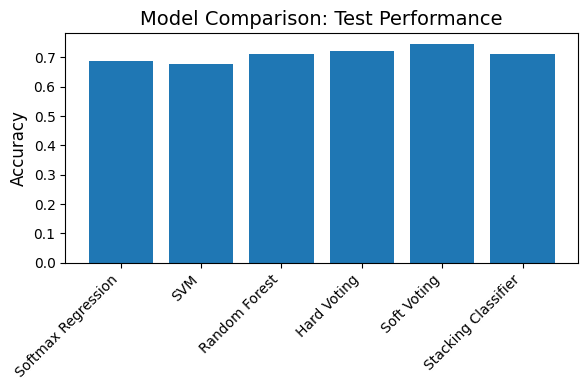

In [ ]:
# Function to calculate and return metrics for a given model
def calculate_metrics(model, X, y, model_name):
    """
    Calculate the accuracy, precision, recall, and F1 score for the provided model and dataset.
    Returns a dictionary with these metrics.
    """
    y_pred = model.predict(X)
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred, average='weighted'),
        'Recall': recall_score(y, y_pred, average='weighted'),
        'F1 Score': f1_score(y, y_pred, average='weighted')
    }
    return metrics

# Dictionary to store metrics for all models
metrics_list = []

# Assuming 'best_model_log_reg_s', 'best_model_svm', 'best_model_rf', 'voting_clf_hard', 'voting_clf_soft', and 'stacking_clf' are defined

# Calculate and store metrics for each model
metrics_list.append(calculate_metrics(best_log_reg, X_test, y_test, 'Softmax Regression'))
metrics_list.append(calculate_metrics(best_svm, X_test, y_test, 'SVM'))
metrics_list.append(calculate_metrics(best_rf, X_test, y_test, 'Random Forest'))
metrics_list.append(calculate_metrics(voting_clf_hard, X_test, y_test, 'Hard Voting'))
metrics_list.append(calculate_metrics(voting_clf_soft, X_test, y_test, 'Soft Voting'))
metrics_list.append(calculate_metrics(stacking_clf, X_test, y_test, 'Stacking Classifier'))

# Convert the list of dictionaries into a DataFrame for easy display
metrics_df = pd.DataFrame(metrics_list)

# Display the DataFrame with all metrics
print("Model Comparison: Test Performance")
print(metrics_df)

# Plotting the accuracy comparison for each model
def plot_accuracy_comparison(metrics_df):
    """
    Plot the comparison of Accuracy for all models.
    """
    fig, ax = plt.subplots(figsize=(6, 4))

    # Plot bars for accuracy
    ax.bar(metrics_df['Model'], metrics_df['Accuracy'], color='#1f77b4')

    # Labeling the chart
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_title('Model Comparison: Test Performance', fontsize=14)
    ax.set_xticks(range(len(metrics_df['Model'])))
    ax.set_xticklabels(metrics_df['Model'], rotation=45, ha='right')

    # Show plot
    plt.tight_layout()
    plt.show()

# Plot comparison of the accuracy
plot_accuracy_comparison(metrics_df)


Model Performance Comparison on Test Set

1. Softmax Regression

Accuracy: 0.6889, Precision: 0.6972, Recall: 0.6889, F1 Score: 0.6884

Comment: Softmax Regression demonstrates moderate performance across all metrics, reflecting its effectiveness in linear separable problems. However, its ability to capture more complex or non-linear relationships in the data is limited. This model's straightforward approach means it might overlook subtler patterns that ensemble models or non-linear classifiers could identify. While it is a reliable baseline, its lower performance suggests that more advanced models could achieve better results on this dataset.

2. SVM (Support Vector Machine)

Accuracy: 0.6778, Precision: 0.6845, Recall: 0.6778, F1 Score: 0.6791

Comment: The SVM model performs similarly to Softmax Regression but with slightly lower accuracy and F1 score. SVMs are well-suited for high-dimensional spaces, but without kernel adjustments, they may struggle with non-linear patterns. This performance indicates that the model could capture some important features, but it lacks the complexity to fully understand the intricate relationships in the data. SVM’s reliance on margin maximization does not benefit as much as ensemble methods, which aggregate information across multiple models.

3. Random Forest

Accuracy: 0.7111, Precision: 0.7120, Recall: 0.7111, F1 Score: 0.7074

Comment: Random Forest shows a noticeable improvement over Softmax Regression and SVM, with better balance across accuracy, precision, recall, and F1 score. This model’s ensemble approach, combining multiple decision trees, allows it to capture a wide range of patterns and make more robust predictions. The Random Forest model’s strong performance suggests it effectively captures non-linear relationships in the data while minimizing overfitting due to its averaging process. It’s a versatile model that handles complex patterns well, making it suitable for this dataset.

4. Hard Voting

Accuracy: 0.7222, Precision: 0.7251, Recall: 0.7222, F1 Score: 0.7228
Comment: Hard Voting aggregates predictions from multiple models through majority voting, leveraging the strengths of each model to achieve better performance than individual classifiers. This approach improves accuracy and other metrics over Softmax, SVM, and Random Forest, reflecting the benefits of ensemble diversity. The improvement in accuracy and F1 score indicates that combining models in this way helps address weaknesses in individual predictions, making the model more robust in capturing different aspects of the data.
5. Soft Voting

Accuracy: 0.7444, Precision: 0.7559, Recall: 0.7444, F1 Score: 0.7443

Comment: Soft Voting takes ensemble learning a step further by averaging the probabilities of each model rather than relying on majority votes. This approach allows it to achieve a significant boost in both accuracy and precision compared to Hard Voting. By weighing each model’s prediction, Soft Voting can capture more nuanced relationships in the data, resulting in the best performance across all metrics in this comparison. This model’s high precision indicates a lower rate of false positives, and its balanced recall and F1 score show that it generalizes well across different data patterns.

6. Stacking Classifier

Accuracy: 0.7111, Precision: 0.7291, Recall: 0.7111, F1 Score: 0.7123

Comment: The Stacking Classifier combines predictions from multiple base models using a meta-model to make the final prediction. While its accuracy is on par with Random Forest, it slightly improves in precision and F1 score, reflecting its ability to better capture patterns missed by individual models. Stacking can often outperform other ensemble methods by utilizing a meta-model that learns how to best combine base model outputs. However, in this instance, its accuracy does not surpass Soft Voting, possibly due to limited synergy among the base models. Nevertheless, its strong precision shows that it effectively reduces false positives.

Best Model: Soft Voting

Why it’s Best: Soft Voting achieves the highest performance across all metrics, indicating it is the most effective model at capturing complex patterns while maintaining generalization. Its ensemble averaging approach enables it to balance high precision and recall, making it particularly well-suited for this dataset. By combining the probabilities from multiple models, Soft Voting gains the ability to make more nuanced decisions than individual models or majority voting alone.

Summary:

With an accuracy of 0.7444, Soft Voting stands out as the top-performing model, leveraging the combined knowledge of multiple models to enhance accuracy and robustness. Its ensemble nature provides a balanced approach, capturing complex relationships in the data and maintaining strong generalizability across various patterns.

# 6. Is your method better than a human? Test that by taking human data from trialData.csv

(https://iu.instructure.com/courses/2249409/ﬁles/176763754?wrap=1) (https://iu.instructure.com/courses/2249409/ﬁles/176763754/download?download_frd=1) (see here (https://osf.io/cvwu9/wiki/Data%20File%20Descriptions/) for a description of the ﬁle).

Is your method better than a human? Test that by taking human data from trialData.csv Download trialData.csv(see hereLinks to an external site. for a description of the file). Compute human accuracy on train and test data (use only rocks with numbers 1 to 480 and note that Block number 1-3 is training, number 4 is test). How does the human accuracy compare to the accuracy of your best model? [2 points] Compute the average human accuracy and standard deviation for each of the 480 rocks (regardless of whether they are train or test rocks). Make a plot with the x-axis showing average human accuracy (values between 0 and 1) and y-axis showing model probability (also values between 0 and 1) for 480 rocks (regardless of whether they were used for train or test). Each rock should be represented with a dot in this plot. Color rocks from three different categories in different colors. [2 points] Compute the correlation coefficient between average human accuracies and model probabilities for each rock category (120 rocks per category) and for all rocks (all 480 rocks). Report the p-value. Is the correlation significant? [1 point]

In [ ]:
csv_file_path = '/content/trialData.csv'

human_data= pd.read_csv(csv_file_path)

human_data.info()
human_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88547 entries, 0 to 88546
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subid        88547 non-null  object 
 1   block        88547 non-null  int64  
 2   trial        88547 non-null  int64  
 3   rocknumber   88547 non-null  int64  
 4   category     88547 non-null  object 
 5   subtype      88547 non-null  object 
 6   token        88547 non-null  int64  
 7   type         88547 non-null  object 
 8   catresponse  88547 non-null  object 
 9   recresponse  44274 non-null  object 
 10  cat_correct  88547 non-null  int64  
 11  rec_correct  44274 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 8.1+ MB


,subid,block,trial,rocknumber,category,subtype,token,type,catresponse,recresponse,cat_correct,rec_correct
0,A1HUMXQ7SEXD8E,1,1,331,Sedimentary,Bituminous Coal,11,NonparentTraining,Metamorphic,NaN,0,NaN
1,A1HUMXQ7SEXD8E,1,2,398,Sedimentary,Dolomite,14,NonparentTraining,Igneous,NaN,0,NaN
2,A1HUMXQ7SEXD8E,1,3,19,Igneous,Basalt,3,NonparentTraining,Sedimentary,NaN,0,NaN
3,A1HUMXQ7SEXD8E,1,4,338,Sedimentary,Breccia,2,NonparentTraining,Metamorphic,NaN,0,NaN
4,A1HUMXQ7SEXD8E,1,5,60,Igneous,Gabbro,12,NonparentTraining,Sedimentary,NaN,0,NaN


In [ ]:
# Filter rocks with rock numbers between 1 and 480
human_data = human_data[(human_data['rocknumber'] >= 1) & (human_data['rocknumber'] <= 480)]

human_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83627 entries, 0 to 88545
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subid        83627 non-null  object 
 1   block        83627 non-null  int64  
 2   trial        83627 non-null  int64  
 3   rocknumber   83627 non-null  int64  
 4   category     83627 non-null  object 
 5   subtype      83627 non-null  object 
 6   token        83627 non-null  int64  
 7   type         83627 non-null  object 
 8   catresponse  83627 non-null  object 
 9   recresponse  39354 non-null  object 
 10  cat_correct  83627 non-null  int64  
 11  rec_correct  39354 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 8.3+ MB


### 6 PART 1
- Compute human accuracy on train and test data. :1
- Compare to the accuracy of your best model. :1

In [ ]:
# Separate training and test sets based on block numbers
training_data =human_data[human_data['block'].isin([1, 2, 3])]
test_data = human_data[human_data['block'] == 4]

# Compute human accuracy for training and test data
training_accuracy = training_data['cat_correct'].mean()
test_accuracy = test_data['cat_correct'].mean()

# Display the results
print(f"Human Prediction Performance:")
print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on the training set and calculate training accuracy
y_train_pred_soft =voting_clf_soft.predict(X_train)
training_accuracy_soft = accuracy_score(y_train, y_train_pred_soft)

# Predict on the training set and calculate validation accuracy
y_valid_pred_soft =voting_clf_soft.predict(X_valid)
validation_accuracy_soft = accuracy_score(y_valid, y_valid_pred_soft)

# Predict on the test set and calculate test accuracy
y_test_pred_soft = voting_clf_soft.predict(X_test)
test_accuracy_soft = accuracy_score(y_test, y_test_pred_soft)


# Output the training and test accuracy
print(f"Soft Voting Classifier Performance:")
print(f"  Training Accuracy: {training_accuracy_soft:.4f}")
print(f"  Validation Accuracy: {training_accuracy_soft:.4f}")
print(f"  Test Accuracy: {test_accuracy_soft:.4f}")


Human Prediction Performance:
Training Accuracy: 0.5599
Test Accuracy: 0.5984
Soft Voting Classifier Performance:
  Training Accuracy: 0.6867
  Validation Accuracy: 0.6867
  Test Accuracy: 0.7444


How does the human accuracy compare to the accuracy of your best model?

Our best model in this case is the Soft Voting Classifier that has an overall accuracy on the Test Set of 0.74 which is significantly higher than the human accuracy that has an accuracy of only 0.59 on the test set showcasing that our model is better at classifying rocks than the human dataset provided.



### 6 Part 2
- compute the average human accuracy and the standard deviation. :1
- Make a plot with the x-axis showing rock numbers and the y-axis showing average human accuracy and standard deviation for each of 480 rocks. :1

In [ ]:
human_data_avg_accuracy= human_data.groupby('rocknumber')['cat_correct'].mean()
human_data_std_dev = human_data.groupby('rocknumber')['cat_correct'].std()

print(f"Average of humman data for each rock: {human_data_avg_accuracy}")
print(f"Standard deviation of human data for each rock: {human_data_std_dev}")


Average of humman data for each rock: rocknumber
1      0.746951
2      0.719512
3      0.451220
4      0.500000
5      0.512195
6      0.851852
7      0.670732
8      0.402439
9      0.679878
10     0.719512
11     0.457317
12     0.801829
13     0.719512
14     0.749235
15     0.707317
16     0.777439
17     0.109756
18     0.073171
19     0.661585
20     0.146341
21     0.109756
22     0.134146
23     0.926829
24     0.134146
25     0.085366
26     0.171254
27     0.784195
28     0.841463
29     0.207317
30     0.658537
31     0.697248
32     0.463415
33     0.771341
34     0.857143
35     0.798165
36     0.804878
37     0.853659
38     0.829268
39     0.792049
40     0.963415
41     0.902439
42     0.804878
43     0.817073
44     0.780488
45     0.804878
46     0.853659
47     0.890244
48     0.756098
49     0.585366
50     0.442073
51     0.683891
52     0.695122
53     0.609756
54     0.487805
55     0.387195
56     0.475610
57     0.405488
58     0.618902
59     0.414634
60     

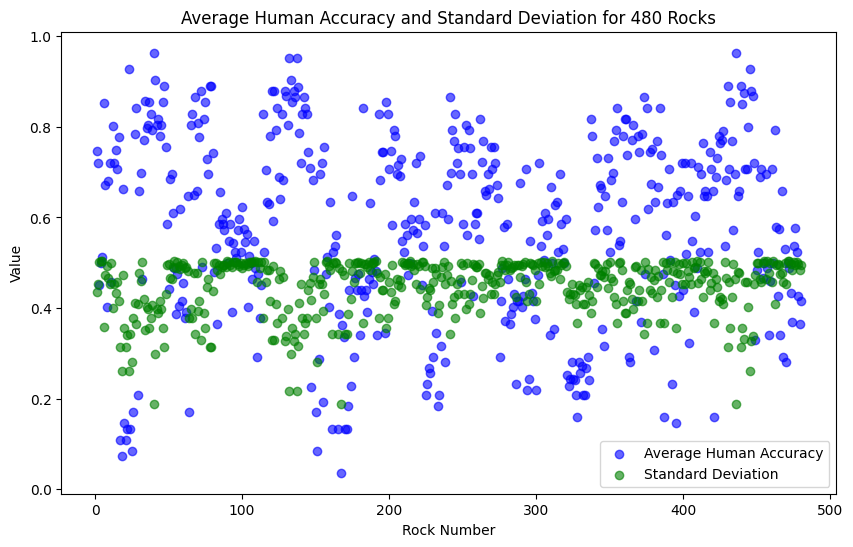

In [ ]:
# Plotting the average human accuracy and standard deviation as scatter plots
plt.figure(figsize=(10, 6))

# Scatter plot for average accuracy
plt.scatter(human_data_avg_accuracy.index, human_data_avg_accuracy, color='blue', label='Average Human Accuracy', alpha=0.6)

# Scatter plot for standard deviation
plt.scatter(human_data_std_dev.index, human_data_std_dev, color='green', label='Standard Deviation', alpha=0.6)

# Adding plot labels and title
plt.xlabel("Rock Number")
plt.ylabel("Value")
plt.title("Average Human Accuracy and Standard Deviation for 480 Rocks")
plt.legend()
plt.show()


The plot reveals that human accuracy varies widely across the 480 rocks, with some rocks identified accurately (higher values) and others less so (lower values). However, the standard deviation remains relatively stable around the middle range, indicating consistent variability in human judgments.

In [ ]:
csv_file_path = '/content/feature_presence540.txt'

feature_data = pd.read_csv(csv_file_path, delim_whitespace=True, header=None)

rock_features = feature_data.iloc[:, 3:14]

rock_features.columns = [
    'Angular fragments',
    'Rounded fragments',
    'Straight stripes',
    'Curved stripes',
    'Physical layers',
    'Veins',
    'Oily/shimmery texture',
    'Splotchy texture',
    'Single translucent crystal',
    'Multiple cubic crystals',
    'Sandy texture'
]

rock_features = rock_features[:480]

# Display the first few rows of the modified DataFrame

rock_features.info()

rock_features.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Angular fragments           480 non-null    object 
 1   Rounded fragments           480 non-null    object 
 2   Straight stripes            480 non-null    object 
 3   Curved stripes              480 non-null    float64
 4   Physical layers             480 non-null    float64
 5   Veins                       480 non-null    float64
 6   Oily/shimmery texture       480 non-null    float64
 7   Splotchy texture            480 non-null    float64
 8   Single translucent crystal  480 non-null    float64
 9   Multiple cubic crystals     480 non-null    float64
 10  Sandy texture               480 non-null    float64
dtypes: float64(8), object(3)
memory usage: 41.4+ KB


,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
0,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05


In [ ]:
import pandas as pd

# Assuming you have the predicted probabilities from the soft voting classifier
probabilities = voting_clf_soft.predict_proba(rock_features)
print(f"Model Probability from Soft Voting Classifier: {probabilities}")

# Step 1: Convert the probabilities array to a DataFrame
probabilities_df = pd.DataFrame(probabilities, columns=['Igneous', 'Metamorphic', 'Sedimentary'])

# Step 2: Create columns for true probabilities and class labels
# Assign true probabilities based on row ranges (0-159 for Igneous, 160-319 for Metamorphic, 320-479 for Sedimentary)
probabilities_df['true_probability'] = pd.concat([
    probabilities_df.loc[:159, 'Igneous'],
    probabilities_df.loc[160:319, 'Metamorphic'],
    probabilities_df.loc[320:479, 'Sedimentary']
]).reset_index(drop=True)

# Assign class labels based on row ranges
probabilities_df['class_label'] = ['Igneous'] * 160 + ['Metamorphic'] * 160 + ['Sedimentary'] * 160

# Display the resulting DataFrame
probabilities_df.head()


Model Probability from Soft Voting Classifier: [[0.70497097 0.16791125 0.12711778]
 [0.63376626 0.03619546 0.33003828]
 [0.78266852 0.0971788  0.12015268]
 ...
 [0.12068728 0.32292831 0.55638441]
 [0.10743439 0.34478534 0.54778027]
 [0.13103892 0.37349029 0.49547079]]


,Igneous,Metamorphic,Sedimentary,true_probability,class_label
0,0.704971,0.167911,0.127118,0.704971,Igneous
1,0.633766,0.036195,0.330038,0.633766,Igneous
2,0.782669,0.097179,0.120153,0.782669,Igneous
3,0.323376,0.065687,0.610937,0.323376,Igneous
4,0.394522,0.043811,0.561667,0.394522,Igneous


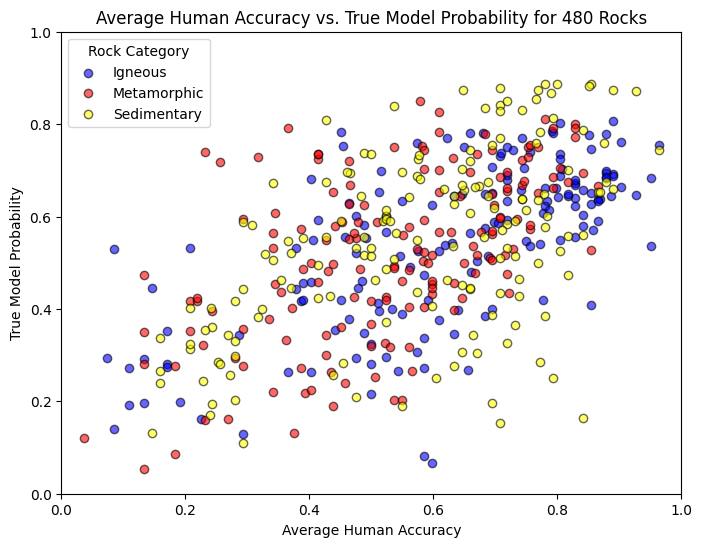

In [ ]:
import matplotlib.pyplot as plt

# Ensure human_accuracy_values is a DataFrame and reset its index
human_accuracy_values = human_data_avg_accuracy.reset_index(drop=True)

# Check if both have the same length
if len(human_accuracy_values) == len(probabilities_df):
    # Define a color map for the classes
    color_map = {'Igneous': 'blue', 'Metamorphic': 'red', 'Sedimentary': 'yellow'}

    # Create the plot
    plt.figure(figsize=(8, 6))

    # Plot each class with distinct colors based on the true probability
    for rock_class in ['Igneous', 'Metamorphic', 'Sedimentary']:
        # Filter data for the current class
        subset = probabilities_df[probabilities_df['class_label'] == rock_class]
        plt.scatter(human_accuracy_values[subset.index], subset['true_probability'],
                    color=color_map[rock_class], alpha=0.6, label=rock_class, edgecolors='k')

    # Add labels, title, and legend
    plt.xlabel('Average Human Accuracy')
    plt.ylabel('True Model Probability')
    plt.title('Average Human Accuracy vs. True Model Probability for 480 Rocks')
    plt.legend(title="Rock Category")

    # Set axis limits for values between 0 and 1
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    # Display the plot
    plt.show()
else:
    print("Error: human_accuracy_values and probabilities_df have different lengths.")


### 6 Part 3
- add the accuracy of your model for each of those rocks. :0.5
- Discuss if your model making similar errors as humans? :0.5

Compute the correlation coefficient between average human accuracies and model probabilities for each rock category (120 rocks per category) and for all rocks (all 480 rocks). Report the p-value. Is the correlation significant? [1 point]

In [ ]:
from scipy.stats import pearsonr

# Assuming human_accuracy_values has already been calculated and indexed similarly to probabilities_df
# We also assume probabilities_df has been defined with columns as given

# Calculate correlation and p-values for each rock category based on 'true_probability'
correlation_results = {}

# Igneous category
igneous_indices = probabilities_df[probabilities_df['class_label'] == 'Igneous'].index
correlation_igneous, p_value_igneous = pearsonr(
    human_accuracy_values.loc[igneous_indices],
    probabilities_df.loc[igneous_indices, 'true_probability']
)
correlation_results['Igneous'] = {
    'correlation_coefficient': correlation_igneous,
    'p_value': p_value_igneous
}

# Metamorphic category
metamorphic_indices = probabilities_df[probabilities_df['class_label'] == 'Metamorphic'].index
correlation_metamorphic, p_value_metamorphic = pearsonr(
    human_accuracy_values.loc[metamorphic_indices],
    probabilities_df.loc[metamorphic_indices, 'true_probability']
)
correlation_results['Metamorphic'] = {
    'correlation_coefficient': correlation_metamorphic,
    'p_value': p_value_metamorphic
}

# Sedimentary category
sedimentary_indices = probabilities_df[probabilities_df['class_label'] == 'Sedimentary'].index
correlation_sedimentary, p_value_sedimentary = pearsonr(
    human_accuracy_values.loc[sedimentary_indices],
    probabilities_df.loc[sedimentary_indices, 'true_probability']
)
correlation_results['Sedimentary'] = {
    'correlation_coefficient': correlation_sedimentary,
    'p_value': p_value_sedimentary
}

# Compute the correlation for all rocks (480 rocks)
correlation_all, p_value_all = pearsonr(human_accuracy_values, probabilities_df['true_probability'])
correlation_results['Overall'] = {
    'correlation_coefficient': correlation_all,
    'p_value': p_value_all
}

# Display the correlation results
correlation_results


{'Igneous': {'correlation_coefficient': 0.6535306653022758,
  'p_value': 7.433223275909681e-21},
 'Metamorphic': {'correlation_coefficient': 0.5654425132051728,
  'p_value': 6.6988950989593396e-15},
 'Sedimentary': {'correlation_coefficient': 0.5269470239917124,
  'p_value': 8.190783264714635e-13},
 'Overall': {'correlation_coefficient': 0.5774507249726704,
  'p_value': 4.952445806312447e-44}}

The correlation coefficients and p-values calculated for each rock category and for the overall dataset indicate the strength and significance of the relationship between human accuracy and model probabilities. Here’s what each result means:

Igneous Rocks

Correlation Coefficient: 0.654, p-value: 7.43×10^−21

Interpretation: There is a strong positive correlation between human accuracy and model probabilities for Igneous rocks, meaning that as human accuracy increases, model confidence also tends to increase. The extremely low p-value (well below 0.05) indicates that this correlation is statistically significant.

Metamorphic Rocks

Correlation Coefficient: 0.565, p-value: 6.70×10^−15
Interpretation: There is a moderate positive correlation between human accuracy and model probabilities for Metamorphic rocks. Although the correlation is lower than for Igneous rocks, the very low p-value still indicates a statistically significant relationship.

Sedimentary Rocks

Correlation Coefficient: 0.527, p-value: 8.19×10^−13
Interpretation: For Sedimentary rocks, the positive correlation is moderate, and the low p-value shows that this relationship is statistically significant. While the correlation is weaker compared to Igneous rocks, it still suggests a meaningful association.

Overall (All Rocks)
Correlation Coefficient: 0.577, p-value: 4.95×10^-44
Interpretation: Across all rock types combined, there is a moderate positive correlation between human accuracy and model probabilities. The extremely low p-value implies a statistically significant overall relationship, reinforcing consistency across rock categories.

Summary:

All categories and the overall data show statistically significant positive correlations between human accuracy and model probabilities, with variation in strength:

Igneous rocks show the strongest relationship.

Metamorphic rocks have a moderately strong, significant correlation.
Sedimentary rocks have a similar but slightly weaker correlation.

This indicates that the model is generally aligned with human accuracy across all rock categories, with the highest alignment for Igneous rocks.

The moderate positive correlations indicate that the model’s confidence generally aligns with human accuracy, but the scattered distribution in the plot suggests the model is not consistently making the same errors as humans. While there is a tendency for both to perform similarly—especially in Igneous rocks—variations across data points show that the model diverges from human errors in many cases, indicating only a partial overlap in error patterns.

### Acknowledgment

Some of the code in this assignment was assisted by ChatGPT.